In [7]:
# Base
import os
import re
import math
import mglearn
import datetime
from time import time
from tqdm import tqdm
import numpy as np  # linear algebra
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#Pandas Config.
#For the default setting: reset_option(param) 
import pandas as pd  # read and wrangle dataframes
pd.set_option("display.max_rows", 100) 
pd.set_option('display.max_columns', 30) #None for the entire columns
pd.set_option('display.max_colwidth', 1000) #None for the entire columns
pd.set_option('display.precision', 3) #precision in terms of decimal places

#Matplotlib Config.
import matplotlib
import matplotlib.pyplot as plt # visualization
from matplotlib import font_manager, rc
matplotlib.style.use('ggplot')  #fivethirtyeight, seaborn
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.family'] = 'serif'  #serif
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['axes.unicode_minus'] = False  #마이너스 깨짐 현상
# rc('font', family='AppleGothic')  #Default 한글폰트
%matplotlib inline 

#Seaborn Config.
import seaborn as sns # statistical visualizations and aesthetics
sns.set_style('whitegrid')
sns.set_context("notebook", rc={"grid.linewidth": 0.6})

%autosave 120

/Users/donginkim/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/donginkim/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Autosaving every 120 seconds


In [8]:
#Data Transformation
# data preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   RobustScaler,
                                   OneHotEncoder,
                                   LabelEncoder, 
                                   Imputer)


# feature selection
from sklearn.feature_selection import SelectFromModel


# model evaluation
from sklearn.model_selection import (KFold,
                                     train_test_split, 
                                     StratifiedShuffleSplit,
                                     cross_validate,
                                     cross_val_score,
                                     learning_curve,
                                     validation_curve,
                                     GridSearchCV,
                                     RandomizedSearchCV)

In [9]:
#ML
# metrics
from sklearn.metrics import (accuracy_score,
                             average_precision_score,
                             confusion_matrix,
                             log_loss,
                             roc_auc_score,
                             roc_curve,
                             mean_absolute_error,
                             mean_squared_error,
                             r2_score)

# persist final model pipeline
from sklearn.externals import joblib


# scikit-learn pipelines
from sklearn.pipeline import make_pipeline, FeatureUnion


# base class
from sklearn.base import BaseEstimator, TransformerMixin


# models: Regressor
from sklearn.linear_model import (Lasso, LassoCV, Ridge, LinearRegression)
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, BaggingRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# models: Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from xgboost import (XGBClassifier, plot_importance)
from lightgbm import (LGBMClassifier, plot_importance)

# Data: UCI Glass Data
The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!


Attribute Information:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

In [10]:
df = pd.read_csv("/Users/donginkim/Dropbox/python/00_data/glass_identification.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.521,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.518,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.516,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.518,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.517,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
features = df.columns[:-1].tolist()  #Type을 제외한 칼럼명

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# EDA

In [13]:
df['Type'].value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

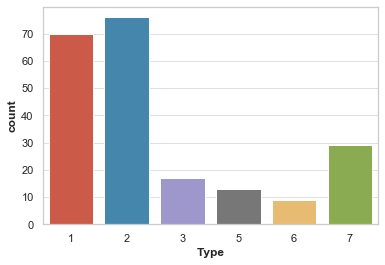

In [14]:
sns.countplot(df['Type']);

The dataset is pretty unbalanced. The instances of types 1 and 2 constitute more than 67 % of the glass types.

In [15]:
pd.melt(df[features])

,variable,value
0,RI,1.521
1,RI,1.518
2,RI,1.516
3,RI,1.518
4,RI,1.517
...,...,...
1921,Fe,0.000
1922,Fe,0.000
1923,Fe,0.000
1924,Fe,0.000


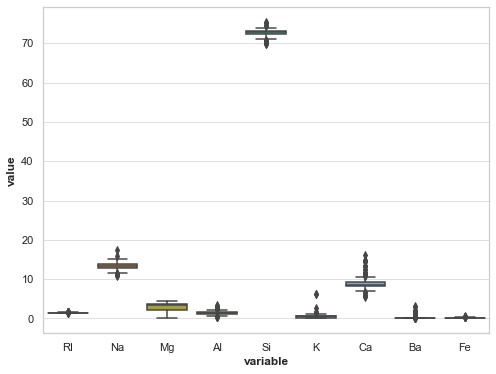

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x="variable", y="value", data=pd.melt(df[features]));

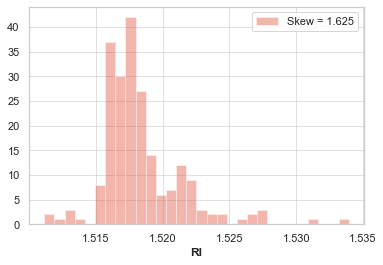

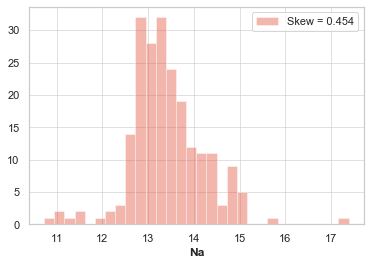

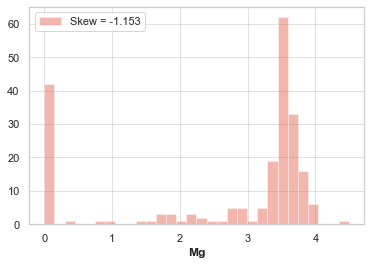

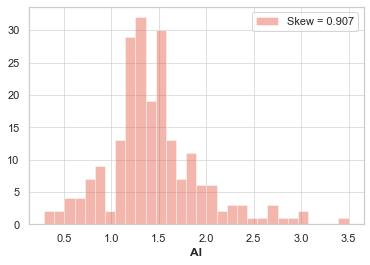

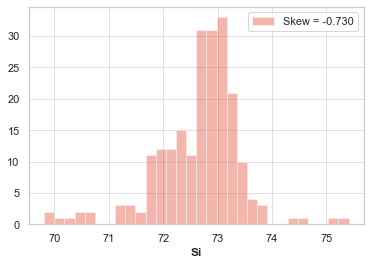

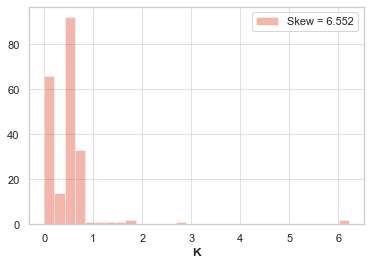

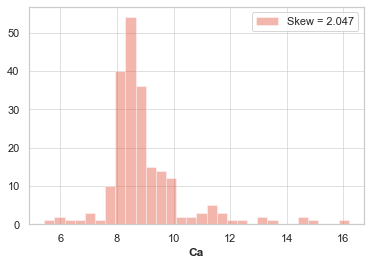

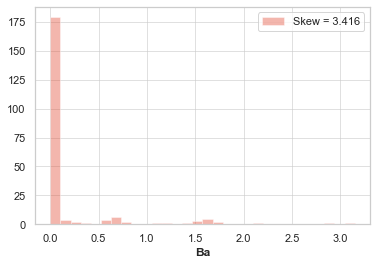

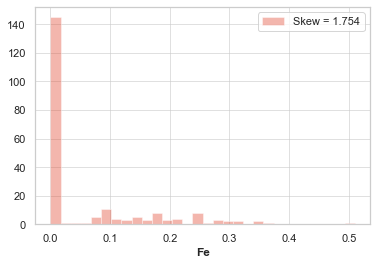

In [17]:
#Testing Skewness

for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

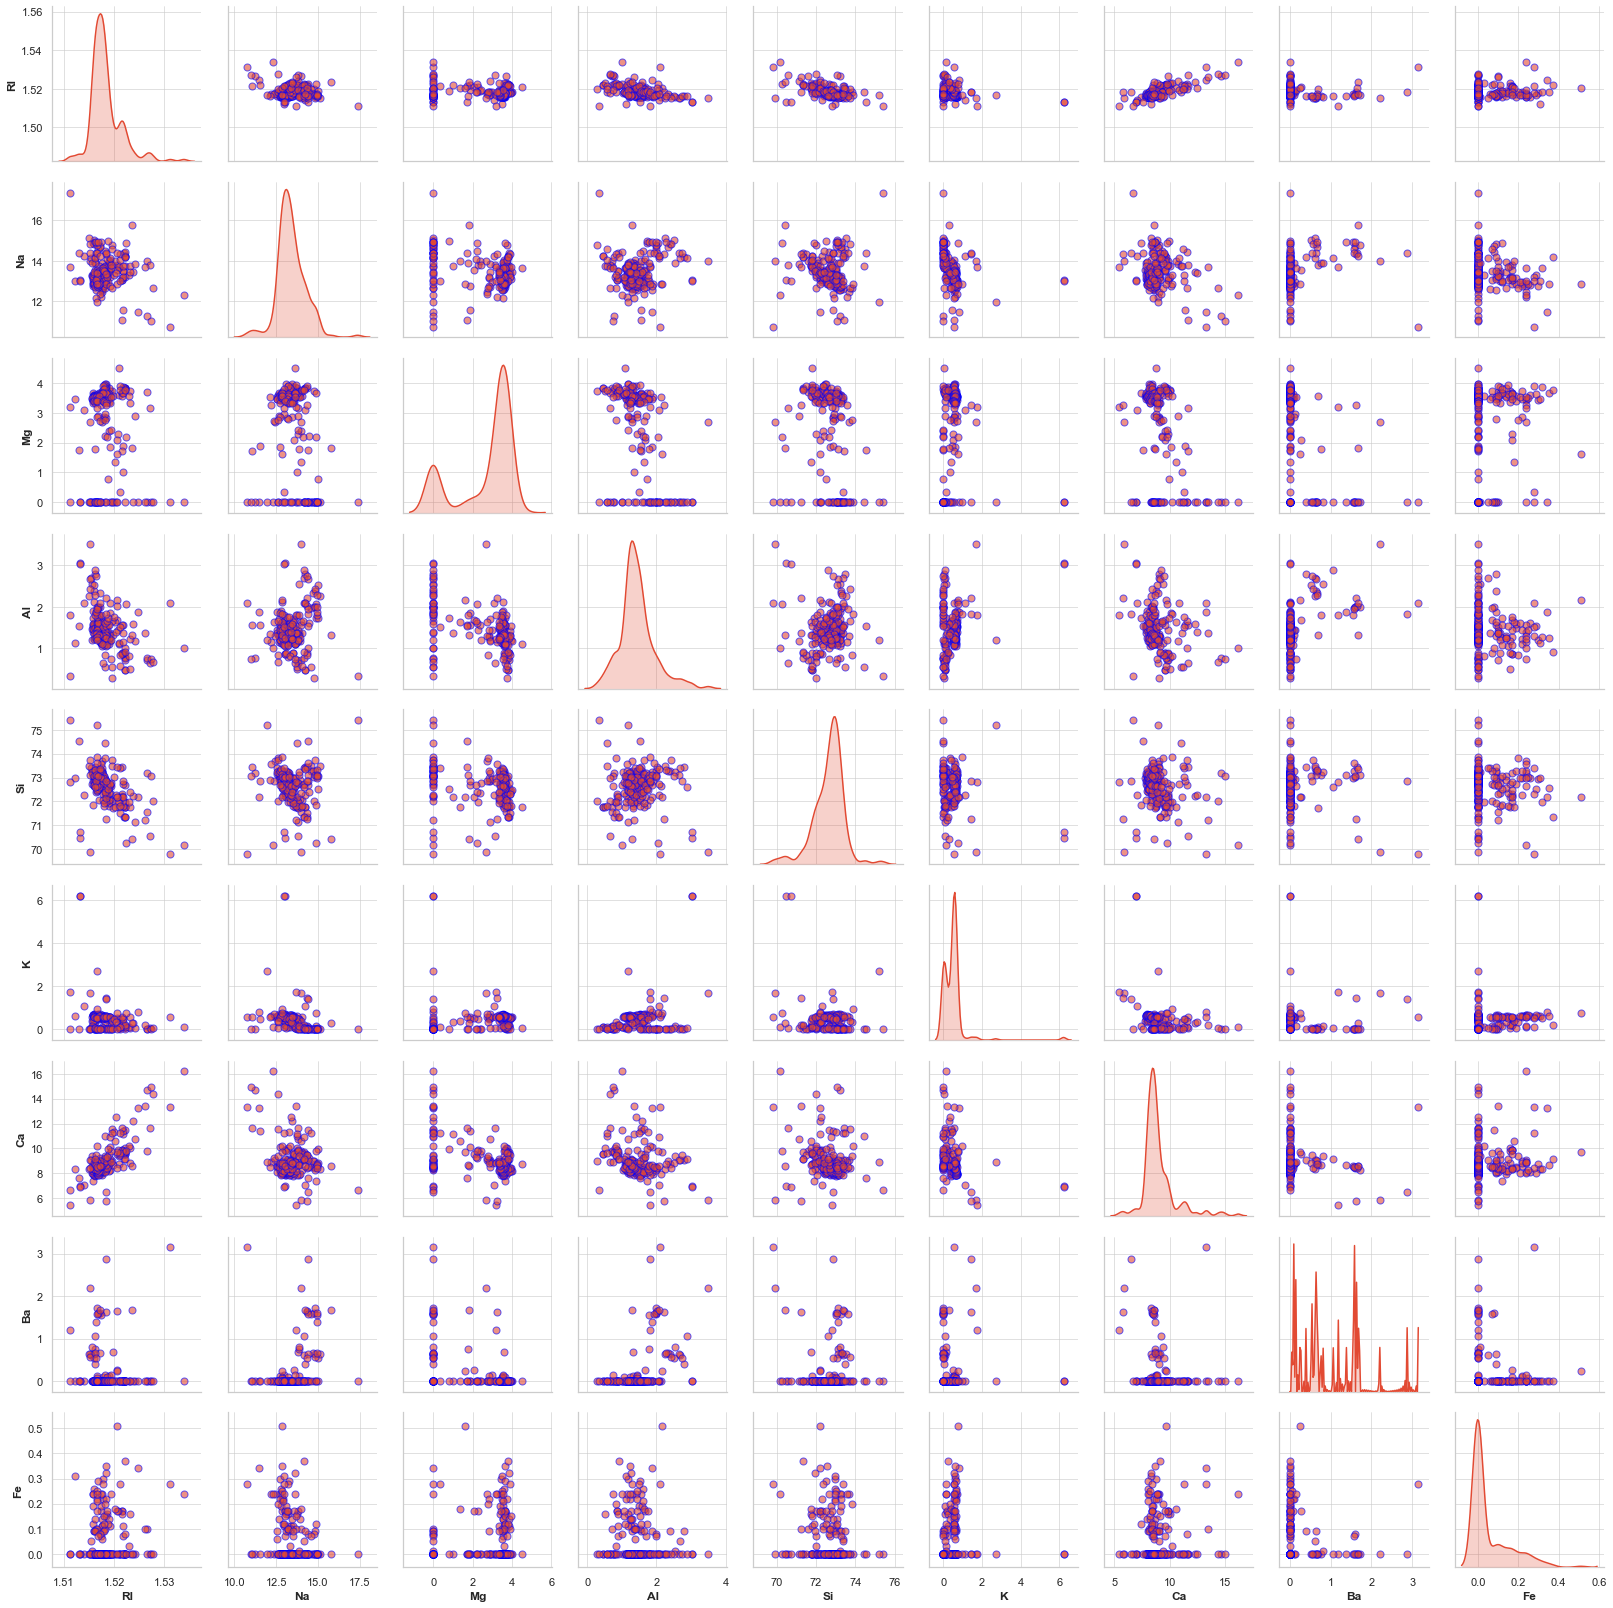

In [18]:
# sns.set(font_scale=2, style="ticks", color_codes=True)
sns.pairplot(df[features],
             diag_kind = "kde",
             plot_kws = {'alpha':0.6, 's':50, 'edgecolor':'b', 'linewidth':1}
            );


- Feature의 평균, 분산을 보면 제각각이다. 
- Logistic Regression 등의 모델을 적용해서 Gradient Descent가 Smoothly converge하기 위해선 Scaling해주는 게 좋을듯하다.

In [21]:
correlations = df.corr()['Type'].drop('Type')
print(correlations)

RI   -1.642e-01
Na    5.029e-01
Mg   -7.450e-01
Al    5.988e-01
Si    1.516e-01
K    -1.005e-02
Ca    9.522e-04
Ba    5.752e-01
Fe   -1.883e-01
Name: Type, dtype: float64


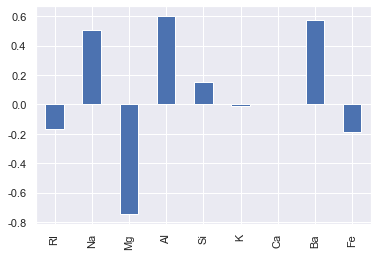

In [22]:
_ = correlations.plot(kind='bar')

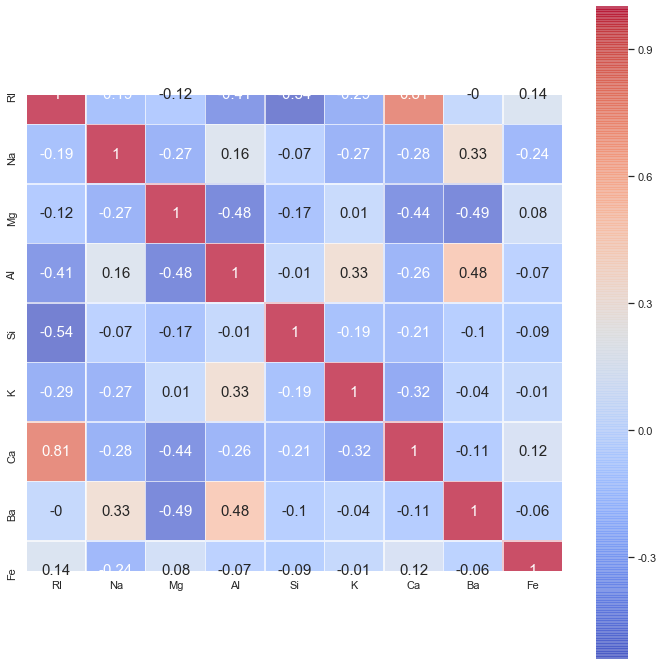

In [19]:
plt.subplots(figsize=(12,12))

sns.set()
sns.heatmap(df[features].corr().round(2), 
            cmap="coolwarm",
            linewidths=.5,
            alpha=.7,
            annot_kws={'size': 15},
            square=True,
            cbar=True,
            annot=True
);

# Outlier Hunt
- 이상값 제거
- 측정오류 등 제거
- Turkey's method
- 예측모델 적용: 트리기반 분류모델, 분류용 SVM
- 공간 변형: 각 샘플이 공간의 가운데서 동일한 거리를 두도록 보정

## Turkey's method

In [91]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

In [92]:
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))  

The dataset contains 14 observations with more than 2 outliers


In [93]:
df[features].shape

(214, 9)

In [94]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 10)


# 결측값 처리
- 결측값의 성격에 따라 결측값 제거, 혹은 결측값 대치를 한다.
- 결측값 대치: 데이터의 성격에 따라 단순히 평균이나 중앙값을 이용하거나, 이전/이후 값으로 대치한다. K-Nearest Neighbors도 많이 사용한다.

- dropna()  
    - #df.dropna(subset=["Ba"])
- drop()  
    - #df.drop("Ba", axis=1)
- fillna()  
    - #df["Ba"].fillna(0, inplace=True)

In [103]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [104]:
df[features].isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [105]:
df[features] = pd.DataFrame(imputer.fit_transform(df[features]), columns=features, index=list(df.index.values))

# 예측변수 제거
- 예측변수가 적을수록 연산시간과 복잡도가 줄어든다.

## 분산으로 제거
- (거의 대부분)단일값으로 이뤄져서 분산이 0에 가까운 의미없는 변수는 제거
- 이런 유형의 변수들은 트리기반모델에서는 분기에 사용될 수 없기 때문에 영향을 주지 않지만, 선형회귀기반 모델에서는 이것을 문제라고 생각해서 계산오류를 낼 수 있다.

## 다중공선성
- 두 예측 변수가 높은 상관관계를 갖는다면, 동일한 정보를 내포하고 있다고 볼 수 있으므로 변수를 제거함으로써 정교하고 해석하기 좋은 모델을 만들수있다.
- correlation plot을 그려 강한 양/음의 상관관계를 가진 변수를 제거한다.
- 너무 많은 예측변수들로 구성돼 이싿면, PCA를 사용해 문제의 크기를 정리한다. 
- PCA로 3~4개의 성분이 분산의 대부분을 차지한다면, 예측변수간에 3~4개의 유의한 관계가 존재한다는 것을 의미한다. 
- VIF(분산팽창인수)를 사용해 영향력 있는 예측변수를 구분한다(보통 threshold를 0.75로 잡음; 예측변수간의 상관계수를 0.75이하로 유지함).

# 예측변수 추가
ML Model은 숫자를 기반하기 때문에 Encoding/Embedding으로 정보를 number-to-text로 변환해줘야 함

## Label Encoding
- 각각의 categorical data에 번호르 매김
- 한 차원내에서 1,2,3,4,5... 등으로 번호가 매겨지게 되면 모델이 데이터에 order나 hiearchy가 존재한다고 가정하게 될 수 있음 --> 성능 떨어짐
- The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
- The number of categories is quite large as one-hot encoding can lead to high memory consumption

In [106]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.521,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.518,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.516,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.518,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.517,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [145]:
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(df[['Type']])
pd.DataFrame(encoded_y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
195,5
196,5
197,5
198,5


## One-Hot Encoding
- 일반적으로 label encoding보다 성능이 좋으나 차원이 늘어남
- 생겨난 가변수들 간의 다중공선성의 문제가 발생함(VIF>5의 가장 높은 VIF 칼럼은 drop하는게 좋음)
- The categorical feature is not ordinal (like the countries above)
- The number of categorical features is less so one-hot encoding can be effectively applied
- 가변수를 각 샘플별로 모두 더하면 1이되고 절편을 구할 때 이 값이 사용될 수 있음; 따라서 모델에 따라서는 사용하지 말아야함
- 트리기반에서는 사용하면 좋음


In [148]:
encoder = OneHotEncoder()
encoded_y = encoder.fit_transform(df[['Type']])
ohe_df = pd.DataFrame(encoded_y.toarray(), columns = encoder.get_feature_names())
ohe_df.head()

,x0_1.0,x0_2.0,x0_3.0,x0_5.0,x0_6.0,x0_7.0
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [149]:
df.join(ohe_df)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,x0_1.0,x0_2.0,x0_3.0,x0_5.0,x0_6.0,x0_7.0
0,1.521,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
1,1.518,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.516,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,1.518,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,1.517,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.516,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,0.0,0.0,0.0,0.0,0.0,1.0
196,1.517,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,0.0,0.0,0.0,0.0,0.0,1.0
197,1.521,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,0.0,0.0,0.0,0.0,0.0,1.0
198,1.517,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,0.0,0.0,0.0,0.0,0.0,1.0


## 구간화
- 하지마셈
- 해석력은 높아지나 정확도나 성능은 떨어지게됨

# Train-Test Split
- 모델의 검정력을 테스트해보기위한 테스트셋에는 Data Transformation을 적용하지 말아야한다(Outlier도 마찬가지이지만 만약에 추후 모델을 적용할 데이터에 outlier를 통제하여 발생하지않도록 할 수 있다면 전체셋에 적용해도 무방).

In [53]:
X = df[features]
y = df["Type"]

X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.521,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.518,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.516,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.518,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.517,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2 , random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 9), (40, 9), (160,), (40,))

# Scaling

## Box-Cox Transformation

In [55]:
from scipy.stats import boxcox
features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(X_train[feature] + 1)  # shift by 1 to avoid computing log of negative values
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)  #한 행으로로 쌓인 각각의 열데이터를, 열로 다시 쌓음 
X_train_bc = pd.DataFrame(data=features_boxcox, columns=features)
# df_bc['Type'] = df['Type']

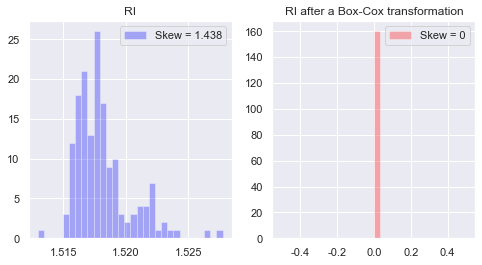

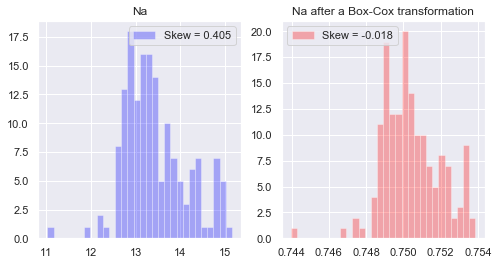

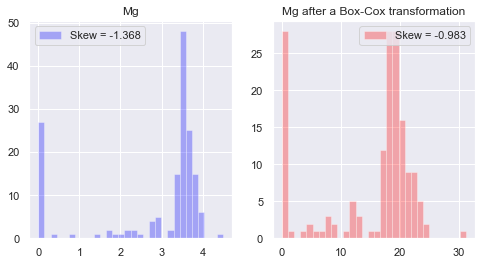

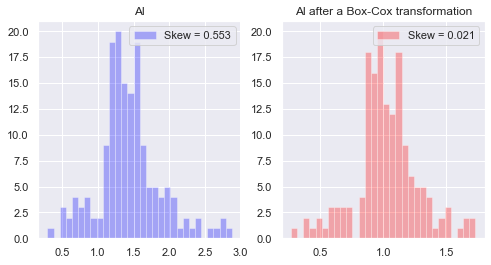

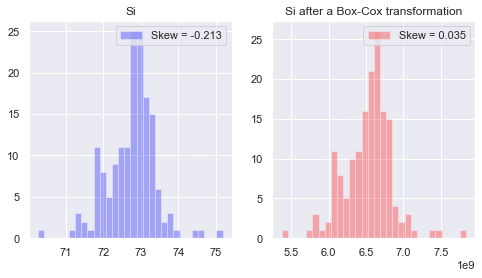

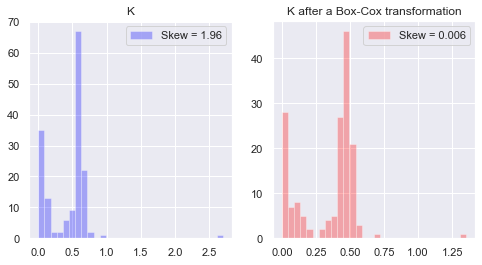

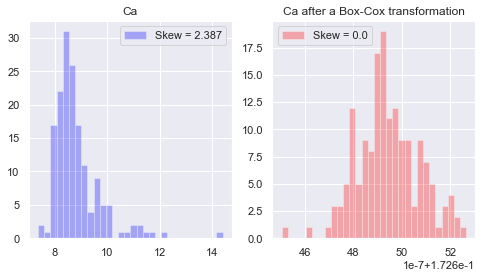

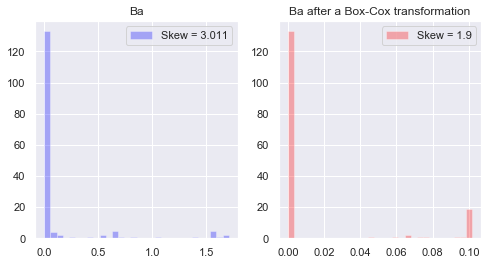

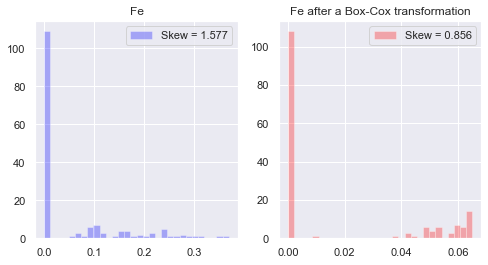

In [56]:
# check if skew is closer to zero after a box-cox transform
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(8,4))    
    ax[0].hist(X_train[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(X_train[feature].skew(),3))) )
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    ax[1].hist(X_train_bc[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(X_train_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

The Box-Cox transform seems to do a good job in reducing the skews of the different distributions of features. However, it does not lead to **the normalization of the feature distributions**. Trial and error showed that it doesn't lead to an improvement of the performance of the used algorithms. Next, let's explore dimensionality reduction techniques.

# 데이터의 차원축소

In [57]:
X_train.shape, y_train.shape

((160, 9), (160,))

In [58]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
79,1.516,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00
197,1.521,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
38,1.522,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00
24,1.517,13.38,3.50,1.15,72.85,0.50,8.43,0.00,0.00
122,1.521,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17
...,...,...,...,...,...,...,...,...,...
106,1.528,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00
14,1.518,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00
92,1.516,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19
179,1.516,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09


## Feature Importance

Elapsed time to train XGBoost  0.084 seconds


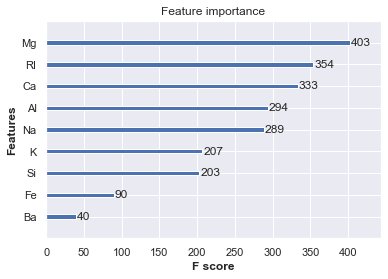

In [59]:
model_importances = XGBClassifier()  #LGBMClassifier()
start = time()
model_importances.fit(X_train, y_train)
print('Elapsed time to train XGBoost  %.3f seconds' %(time()-start))
plot_importance(model_importances)
plt.show()

It appears that no main features dominate the importance in the LGBM modeling of the problem.

## Principal Component Analysis(PCA)
: 정보량을 최대화한 예측변수의 선형 조합을 찾아낸다.

1. 모든 가능한 선형 조합에서 가장 분산이 큰 예측 변수를 찾는다.
2. 데이터를 다양한 축을 중심으로 회전시켜서, 첫 번째 PC와 상관관계가 없는(Orthogonal) 선형 조합이면서 분산이 그 다음으로 큰 PC를 찾는다.
3. 일반적으로 원본 특성 개수만큼의 주성분이 존재
4. 주로, 고차원 데이터셋의 시각화, 차원축소, 특성추출에서 이용
5. 서로 다른 분포 형태와 예측 변수의 단위 정보를 고려하게 하려면 우선 예측 변수의 쏠린 형태를 변형하고 PCA를 적용하는 게 좋다.

참고링크: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

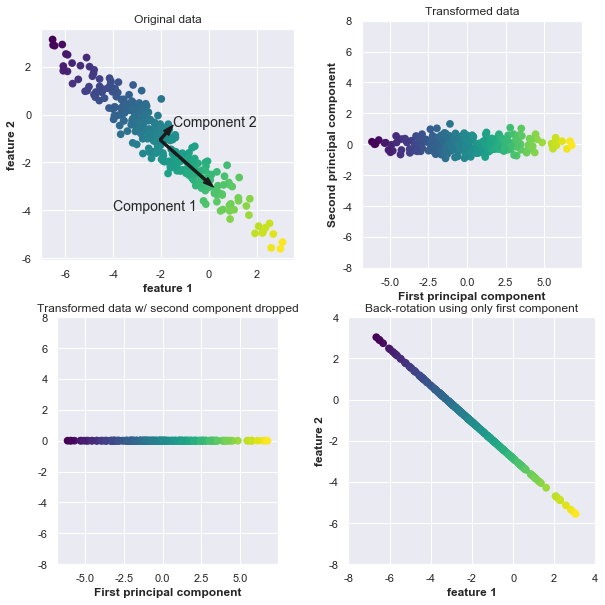

In [60]:
mglearn.plots.plot_pca_illustration()

### Selecting the Number of Components(dimensions)

In [61]:
pca = PCA(random_state = 42)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

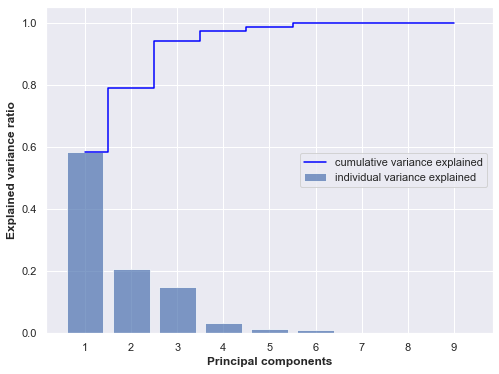

PC1 Cumulative variance: 58.301%
PC2 Cumulative variance: 79.067%
PC3 Cumulative variance: 94.014%
PC4 Cumulative variance: 97.152%
PC5 Cumulative variance: 98.619%
PC6 Cumulative variance: 99.765%
PC7 Cumulative variance: 99.962%
PC8 Cumulative variance: 100.000%
PC9 Cumulative variance: 100.000%


In [62]:
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'blue')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

# Cumulative variance explained
for i, sum in enumerate(cum_var_exp):
    print("PC" + str(i+1), "Cumulative variance: %.3f%%" %(cum_var_exp[i]*100))

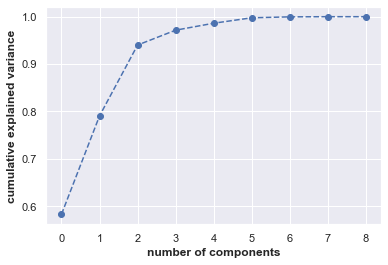

In [63]:
#simpler version
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The first 3 components contain 86% of the variance, while I need 5 more components to describe close to 100% of the variance.

### PCA

In [64]:
pca=PCA(n_components=5) #99% of the variance explained
pca.fit(X_train) 
X_pca=pca.fit_transform(X_train) 

In [65]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio

array([0.59117967, 0.21057029, 0.15156129, 0.03181744, 0.01487131])

In [66]:
X_pca = pd.DataFrame(pca.transform(X_train))
X_pca.columns = ["P" + str(i) for i in range(1,6)]
X_pca.round(2).head()

,P1,P2,P3,P4,P5
0,-0.97,-0.70,0.43,-0.54,-0.02
1,3.03,-1.49,-0.37,0.19,0.75
2,-0.78,1.28,-1.22,0.64,0.01
3,-0.80,-0.19,0.02,0.26,-0.07
4,0.87,0.64,-0.26,-0.47,0.08


In [67]:
for p in X_pca.columns:
    
    new_df = X.copy()
    new_df[p] = X_pca[p]
    display(pd.DataFrame(new_df.corr().round(2)[p]).drop(p,0).T)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
P1,-0.05,-0.04,-0.05,-0.01,0.06,-0.04,0.02,0.05,0.23


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
P2,-0.06,0.11,0.03,-0.0,-0.03,-0.06,-0.05,0.07,0.14


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
P3,-0.08,0.0,-0.1,-0.01,0.03,0.01,0.04,0.04,0.07


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
P4,-0.0,-0.16,0.03,0.06,0.05,0.06,-0.0,0.01,-0.07


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
P5,0.01,0.15,0.05,-0.09,-0.08,-0.04,-0.04,0.08,0.04


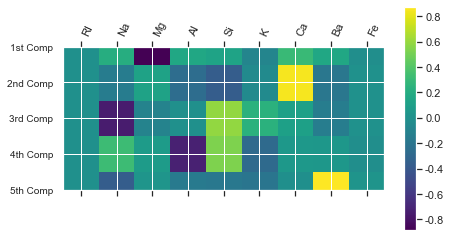

In [68]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'], fontsize=10)
plt.colorbar()

plt.xticks(range(len(X.columns)),X.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show(); 

In [69]:
X_pca['type'] = df['Type']
X_pca.head()

,P1,P2,P3,P4,P5,type
0,-0.971,-0.703,0.433,-0.536,-0.020,1
1,3.034,-1.493,-0.374,0.186,0.749,1
2,-0.780,1.280,-1.221,0.636,0.007,1
3,-0.801,-0.194,0.021,0.258,-0.068,1
4,0.867,0.635,-0.255,-0.469,0.082,1


### 3D Scatter Plot

In [70]:
pca=PCA(n_components=3) 
pca.fit(X_train) 
X_pca_3d=pca.fit_transform(X_train) 

X_pca_3d = pd.DataFrame(X_pca_3d)
X_pca_3d['type'] = df['Type']
X_pca_3d.head()

,0,1,2,type
0,-0.971,-0.703,0.433,1
1,3.034,-1.493,-0.374,1
2,-0.780,1.280,-1.221,1
3,-0.801,-0.194,0.021,1
4,0.867,0.635,-0.255,1


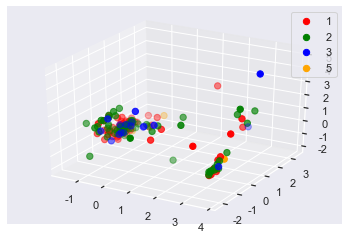

In [71]:
from mpl_toolkits.mplot3d import Axes3D

labels = X_pca_3d.type
cdict={1:'red',2:'green', 3:'blue', 4:'yellow', 5:'orange', 6:'black', 7:'purple'}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in np.unique(labels):
    mask = (X_pca_3d['type'] == i)   
    ax.scatter(X_pca_3d.loc[mask, 0], X_pca_3d.loc[mask, 2], X_pca_3d.loc[mask, 1], \
               label=i, c=cdict[i], s=40)

plt.legend();

### 2D Scatter Plot

In [72]:
pca=PCA(n_components=2) 
pca.fit(X_train) 
X_pca_2d=pca.fit_transform(X_train) 

X_pca_2d = pd.DataFrame(X_pca_2d)
X_pca_2d['type'] = df['Type']
X_pca_2d.head()

,0,1,type
0,-0.971,-0.703,1
1,3.034,-1.493,1
2,-0.780,1.280,1
3,-0.801,-0.194,1
4,0.867,0.635,1


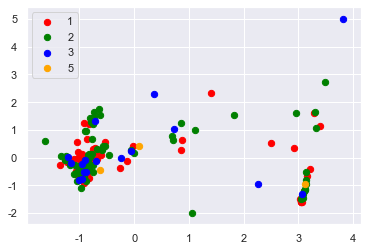

In [73]:
labels = X_pca_2d.type
cdict={1:'red',2:'green', 3:'blue', 4:'yellow', 5:'orange', 6:'black', 7:'purple'}

fig = plt.figure()
ax = fig.add_subplot(111)

for i in np.unique(labels):
    mask = (X_pca_2d['type'] == i)   
    ax.scatter(X_pca_2d.loc[mask, 0], X_pca_2d.loc[mask, 1], \
               label=i, c=cdict[i], s=40)

plt.legend();

# Model

## Pipelines

SVC: 71.140100 (+/- 8.240554) performed in 2.692433 seconds
KNN: 64.858290 (+/- 6.049110) performed in 0.067276 seconds
RF: 74.405556 (+/- 4.689210) performed in 0.816820 seconds
Ada: 46.254718 (+/- 8.521607) performed in 0.737125 seconds
ET: 74.091535 (+/- 4.828383) performed in 0.559667 seconds
GB: 70.544621 (+/- 4.951984) performed in 0.934563 seconds
LR: 69.745870 (+/- 7.633729) performed in 0.041221 seconds


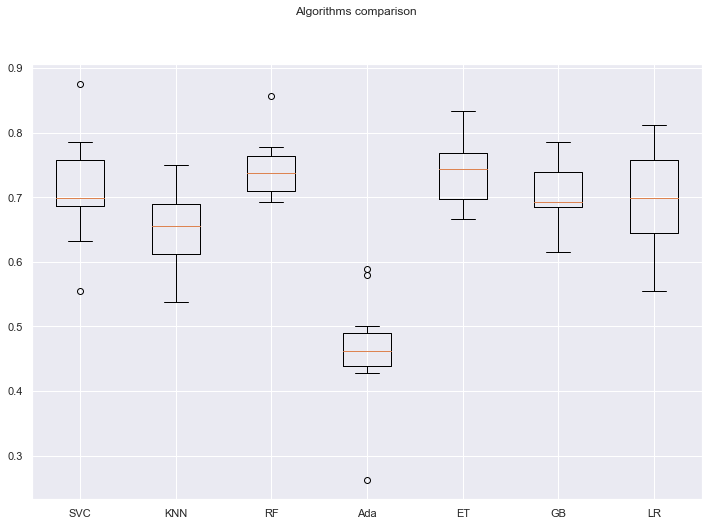

In [74]:
n_components = 5
pipelines = []
n_estimators = 200

#print(df.shape)
pipelines.append( ('SVC',
                   Pipeline([
                              ('sc', StandardScaler()),
#                               ('pca', PCA(n_components = n_components, random_state=seed ) ),
                             ('SVC', SVC(random_state=seed))]) ) )


pipelines.append(('KNN',
                  Pipeline([ 
                              ('sc', StandardScaler()),
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ),
                            ('KNN', KNeighborsClassifier()) ])))
pipelines.append( ('RF',
                   Pipeline([
                              ('sc', StandardScaler()),
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators)) ]) ))


pipelines.append( ('Ada',
                   Pipeline([ 
                              ('sc', StandardScaler()),
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                    ('Ada', AdaBoostClassifier(random_state=seed,  n_estimators=n_estimators)) ]) ))

pipelines.append( ('ET',
                   Pipeline([
                              ('sc', StandardScaler()),
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('ET', ExtraTreesClassifier(random_state=seed, n_estimators=n_estimators)) ]) ))
pipelines.append( ('GB',
                   Pipeline([ 
                             ('sc', StandardScaler()),
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('GB', GradientBoostingClassifier(random_state=seed)) ]) ))

pipelines.append( ('LR',
                   Pipeline([
                              ('sc', StandardScaler()),
#                               ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('LR', LogisticRegression(random_state=seed)) ]) ))

results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring,
                                n_jobs=-1) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The best performances are achieved by RF. However, RF also yields a wide distribution. It is worthy to continue our study by tuning RF.

Logistic Regression performs badly. This might be due to the fact that the data is not normally distributed as these algorithms perform well when data that is normally distributed.

## Parameter Tuning

In [75]:
# Create a pipeline with a Random forest classifier
pipe_rfc = Pipeline([ 
                      ('scl', StandardScaler()), 
                    ('rfc', RandomForestClassifier(random_state=seed, n_jobs=-1) )])

# Set the grid parameters
param_grid_rfc =  [ {
    'rfc__n_estimators': [100, 200,300,400], # number of estimators
    #'rfc__criterion': ['gini', 'entropy'],   # Splitting criterion
    'rfc__max_features':[0.05 , 0.1], # maximum features used at each split
    'rfc__max_depth': [None, 5], # Max depth of the trees
    'rfc__min_samples_split': [0.005, 0.01], # mininal samples in leafs
    }]
# Use 10 fold CV
kfold = StratifiedKFold(n_splits=num_folds, random_state= seed)
grid_rfc = GridSearchCV(pipe_rfc, param_grid= param_grid_rfc, cv=kfold, scoring=scoring, verbose= 1, n_jobs=-1)

#Fit the pipeline
start = time()
grid_rfc = grid_rfc.fit(X_train, y_train)
end = time()

print("RFC grid search took %.3f seconds" %(end-start))

# Best score and best parameters
print('-------Best score----------')
print(grid_rfc.best_score_ * 100.0)
print('-------Best params----------')
print(grid_rfc.best_params_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   38.5s finished


RFC grid search took 38.849 seconds
-------Best score----------
75.0
-------Best params----------
{'rfc__max_depth': None, 'rfc__max_features': 0.05, 'rfc__min_samples_split': 0.005, 'rfc__n_estimators': 200}


## Diagnose the performance of the best algorithms

In [76]:
# Let's define some utility functions to plot the learning & validation curves

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()    
    
def plot_validation_curve(param_range, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Parameter value')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()    

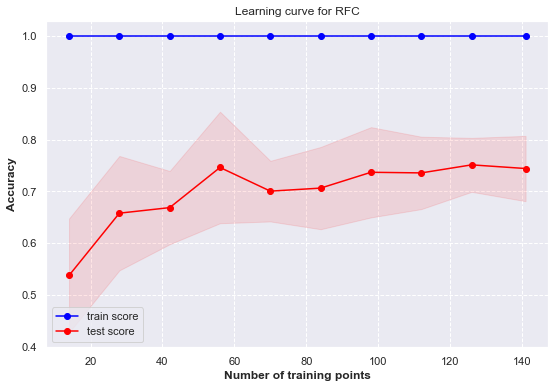

In [77]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
              estimator= grid_rfc.best_estimator_ , X= X_train, y = y_train, 
              train_sizes=np.arange(0.1,1.1,0.1), cv= 10,  scoring='accuracy', n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for RFC')